<a href="https://colab.research.google.com/github/Earlyyyyy/dicoding-submission-data-analytics-streamlit/blob/main/dicoding_submission_data_analytics_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** David Hendrawan
- **Email:** hendrawan7670@gmail.com
- **ID Dicoding:** earlyy

## Menentukan Pertanyaan Bisnis

- How was the trend towards bike-sharing usage from 2011 to 2012?
- How do weather conditions relate to bike sharing service usage
 trends?
- How does time affect the amount of bike-sharing usage?
- What is the correlation between humidity and wind speed with total bike rentals?

## Import Semua Packages/Library yang Digunakan

In [1]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

## Data Wrangling

### Gathering Data

Load hour_data

In [2]:
hour_data = pd.read_csv("https://raw.githubusercontent.com/Earlyyyyy/dicoding-submission-data-analytics-streamlit/main/data/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Load day_data

In [3]:
day_data = pd.read_csv("https://raw.githubusercontent.com/Earlyyyyy/dicoding-submission-data-analytics-streamlit/main/data/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- load hour data
- Load day_data

### Assessing Data

#### Hour Data




Check data type and amount of data from hour_data

In [4]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Check duplicate data

In [5]:
print("Number of duplicates: ", hour_data.duplicated().sum())

Number of duplicates:  0


Check statistical parameters

In [6]:
hour_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Check data

In [7]:
hour_data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


#### Day Data

Check data type and amount of data from day_data

In [8]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Check duplicate data

In [9]:
print("Number of duplicates: ", day_data.duplicated().sum())

Number of duplicates:  0


Check statistical parameters

In [10]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Check data

In [11]:
day_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Check missing value, duplicate value, invalid value, inconsistent value and outlier

### Cleaning Data

Delete irrelevant data from hour_data

In [12]:
drop_col = ["instant"]
for i in hour_data.columns:
  if i in drop_col:
    hour_data.drop(labels=i, axis=1, inplace=True)
hour_data.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Delete irrelevant data from day_data

In [13]:
drop_col = ["instant"]
for i in day_data.columns:
  if i in drop_col:
    day_data.drop(labels=i, axis=1, inplace=True)
day_data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Change the column name in hour_data

In [14]:
hour_data.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit": "weather_category",
    "hum": "humidity",
    "cnt": "count"
}, inplace=True)
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateday           17379 non-null  object 
 1   season            17379 non-null  int64  
 2   year              17379 non-null  int64  
 3   month             17379 non-null  int64  
 4   hour              17379 non-null  int64  
 5   holiday           17379 non-null  int64  
 6   weekday           17379 non-null  int64  
 7   workingday        17379 non-null  int64  
 8   weather_category  17379 non-null  int64  
 9   temp              17379 non-null  float64
 10  atemp             17379 non-null  float64
 11  humidity          17379 non-null  float64
 12  windspeed         17379 non-null  float64
 13  casual            17379 non-null  int64  
 14  registered        17379 non-null  int64  
 15  count             17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memo

Change the column name in day_data

In [15]:
day_data.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather_category",
    "hum": "humidity",
    "cnt": "count"
}, inplace=True)
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateday           731 non-null    object 
 1   season            731 non-null    int64  
 2   year              731 non-null    int64  
 3   month             731 non-null    int64  
 4   holiday           731 non-null    int64  
 5   weekday           731 non-null    int64  
 6   workingday        731 non-null    int64  
 7   weather_category  731 non-null    int64  
 8   temp              731 non-null    float64
 9   atemp             731 non-null    float64
 10  humidity          731 non-null    float64
 11  windspeed         731 non-null    float64
 12  casual            731 non-null    int64  
 13  registered        731 non-null    int64  
 14  count             731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


Change the column name in hour_data

In [16]:
hour_data.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "hr" : "hour",
    "weathersit": "weather_category",
    "hum": "humidity",
    "cnt": "count"
}, inplace=True)
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateday           731 non-null    object 
 1   season            731 non-null    int64  
 2   year              731 non-null    int64  
 3   month             731 non-null    int64  
 4   holiday           731 non-null    int64  
 5   weekday           731 non-null    int64  
 6   workingday        731 non-null    int64  
 7   weather_category  731 non-null    int64  
 8   temp              731 non-null    float64
 9   atemp             731 non-null    float64
 10  humidity          731 non-null    float64
 11  windspeed         731 non-null    float64
 12  casual            731 non-null    int64  
 13  registered        731 non-null    int64  
 14  count             731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


Change data type dateday from hour_data to datetime

In [17]:
hour_data["dateday"] = pd.to_datetime(hour_data["dateday"])
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateday           17379 non-null  datetime64[ns]
 1   season            17379 non-null  int64         
 2   year              17379 non-null  int64         
 3   month             17379 non-null  int64         
 4   hour              17379 non-null  int64         
 5   holiday           17379 non-null  int64         
 6   weekday           17379 non-null  int64         
 7   workingday        17379 non-null  int64         
 8   weather_category  17379 non-null  int64         
 9   temp              17379 non-null  float64       
 10  atemp             17379 non-null  float64       
 11  humidity          17379 non-null  float64       
 12  windspeed         17379 non-null  float64       
 13  casual            17379 non-null  int64         
 14  registered        1737

Change data type dateday from day_data to datetime

In [18]:
day_data["dateday"] = pd.to_datetime(day_data["dateday"])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateday           731 non-null    datetime64[ns]
 1   season            731 non-null    int64         
 2   year              731 non-null    int64         
 3   month             731 non-null    int64         
 4   holiday           731 non-null    int64         
 5   weekday           731 non-null    int64         
 6   workingday        731 non-null    int64         
 7   weather_category  731 non-null    int64         
 8   temp              731 non-null    float64       
 9   atemp             731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual            731 non-null    int64         
 13  registered        731 non-null    int64         
 14  count             731 non-

## Exploratory Data Analysis (EDA)

### Explore trend bike-sharing from 2011 to 2012

In [19]:
day_data.groupby(by=["year", "month"], observed=False).agg({
    "count": ["max", "min", "mean", "sum"]
})

count                           
             max   min         mean     sum
year month                                 
0    1      1985   431  1231.903226   38189
     2      2927  1005  1721.964286   48215
     3      3239   605  2065.967742   64045
     4      5312   795  3162.333333   94870
     5      5805  2633  4381.322581  135821
     6      5515  3767  4783.733333  143512
     7      6043  3285  4559.387097  141341
     8      5895  1115  4409.387097  136691
     9      5423  1842  4247.266667  127418
     10     5511   627  3984.225806  123511
     11     4486  1495  3405.566667  102167
     12     3940   705  2816.870968   87323
1    1      4521  1301  3120.774194   96744
     2      5062  1529  3556.448276  103137
     3      8362  3194  5318.548387  164875
     4      7460  1027  5807.466667  174224
     5      8294  2843  6318.225806  195865
     6      8120  4127  6761.000000  202830
     7      8173  4459  6567.967742  203607
     8      7865  4549  6919.451613  214503
     9      8714  4073  7285.766667  218573
     10     8156    22  6414.225806  198841
     11     6852  2277  5088.800000  152664
     12     6606   441  3990.741935  123713

###Explore total bicycle rentals against the weather influences

In [20]:
day_data.groupby(by="weather_category", observed=False).agg({
    "count": ["max", "min", "mean", "sum"]
})

count                           
                   max  min         mean      sum
weather_category                                 
1                 8714  431  4876.786177  2257952
2                 8362  605  4035.862348   996858
3                 4639   22  1803.285714    37869

###Explore total bicycle rental by time

In [21]:
user_hour = hour_data.groupby(by="hour", observed=False).agg({
    "count": ["max", "min", "mean", "sum"]
})
user_hour

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

Explore total bike rentals by humidity and windspeed

In [22]:
user_humidity = day_data.groupby(by="humidity", observed=False).agg({
    "count": ["max", "min", "mean", "sum"]
})
user_humidity

count                    
           max   min    mean   sum
humidity                          
0.000000   623   623   623.0   623
0.187917  1635  1635  1635.0  1635
0.254167  6857  6857  6857.0  6857
0.275833  5169  5169  5169.0  5169
0.290000  5102  5102  5102.0  5102
...        ...   ...     ...   ...
0.948261   605   605   605.0   605
0.949583  2594  2594  2594.0  2594
0.962500  1607  1607  1607.0  1607
0.970417   705   705   705.0   705
0.972500  2395  2395  2395.0  2395

[595 rows x 4 columns]

In [23]:
user_windspeed = day_data.groupby(by="windspeed", observed=False).agg({
    "count": ["max", "min", "mean", "sum"]
})
user_windspeed

count                    
            max   min    mean   sum
windspeed                          
0.022392   4985  4985  4985.0  4985
0.042304   5117  5117  5117.0  5117
0.045404   5409  5409  5409.0  5409
0.045408   1712  1712  1712.0  1712
0.046650   5087  5087  5087.0  5087
...         ...   ...     ...   ...
0.417908   1913  1913  1913.0  1913
0.421642   2732  2732  2732.0  2732
0.422275   4195  4195  4195.0  4195
0.441563   5382  5382  5382.0  5382
0.507463   1635  1635  1635.0  1635

[650 rows x 4 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1 : How was the trend towards bike-sharing usage from 2011 to 2012?

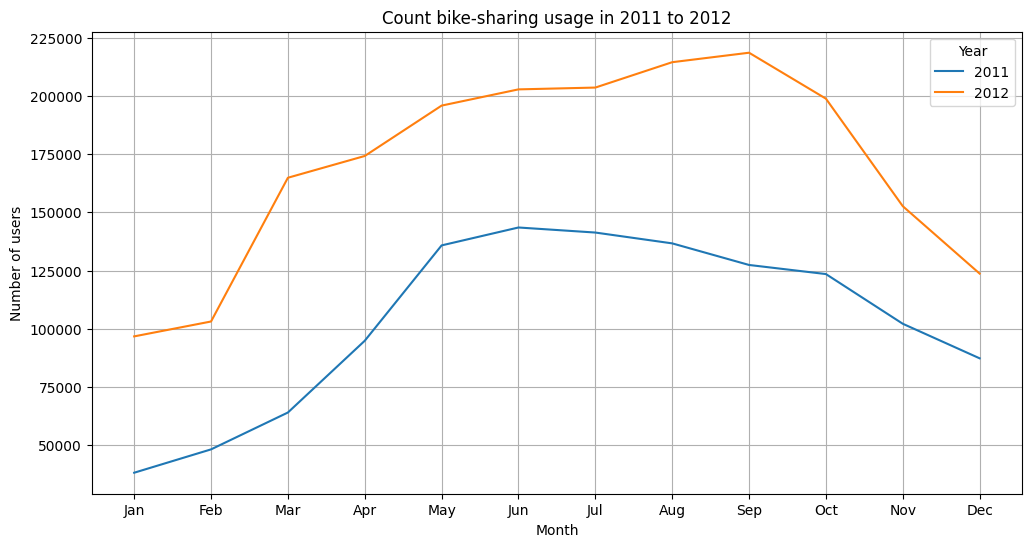

In [24]:
users_by_month = day_data.groupby(by=["year", "month"]).agg({
    "count": "sum"
}).reset_index()

plt.figure(figsize=(12, 6))
for year in users_by_month['year'].unique():
    years = 2011 + year
    data_year = users_by_month[users_by_month['year'] == year]
    plt.plot(data_year['month'], data_year['count'], label=str(years))

plt.xlabel("Month")
plt.ylabel("Number of users")
plt.title("Count bike-sharing usage in 2011 to 2012")
plt.legend(title="Year")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.gca().xaxis.grid(False)
plt.grid(True)
plt.show()


There is a difference between the peak and valley of bike-sharing usage in the months of two years (2011 and 2012). The peak in 2011 occurred in June and the valley occurred in January, while the peak in 2012 occurred in September and the same valley in January. From the visualization, we can observe that the total number of bikes rented in 2012, overall, increased significantly compared to 2011.

### Pertanyaan 2 : How do weather conditions relate to bike-sharing service usage trends?

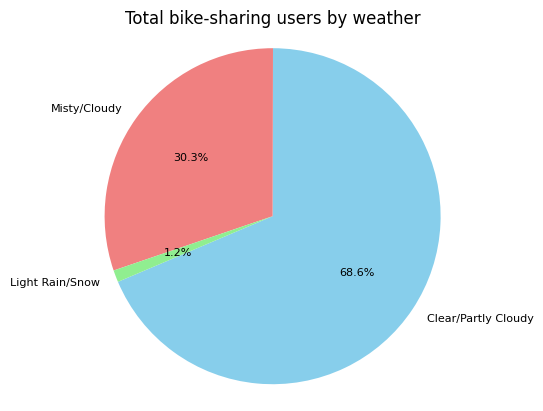

In [25]:
weather_data = day_data.groupby('weather_category')['count'].sum()

weather_dict = weather_data.to_dict()

weather_label = ['Clear/Partly Cloudy', 'Misty/Cloudy', 'Light Rain/Snow']

plt.pie(weather_dict.values(),
        labels=weather_label,
        autopct='%1.1f%%',
        colors=["skyblue", "lightcoral", "lightgreen"],
        startangle=-157,
        textprops={'fontsize': 8}
)
plt.title("Total bike-sharing users by weather", fontsize=12)
plt.axis('equal')

# Display the plot
plt.show()

The percentage of total bicycle rentals during clear/partly cloudy weather was 63.3%. This is significantly higher than during misty/cloudy weather which was only 33.8% and during light rain/snow weather which was only 2.9%.

### Pertanyaan 3 : How does time affect the amount of bike-sharing usage?

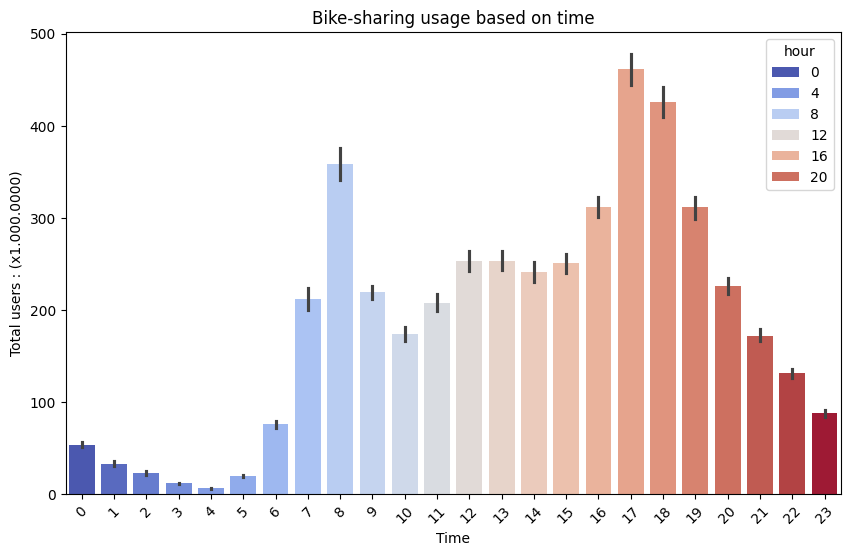

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hour',
            y="count",
            data=hour_data,
            hue="hour",
            palette="coolwarm"
)
plt.title("Bike-sharing usage based on time")
plt.xlabel("Time")
plt.ylabel("Total users : (x1.000.0000)")
plt.xticks(rotation=45)
plt.show()

From the visualization above, it can be seen that the lowest bicycle rentals occur in the time range 11pm - 6am, while the highest peak bicycle rentals occur at 8am and in the time range 5pm - 6pm.

### Pertanyaan 4 : What is the correlation between humidity and wind speed with total bike rentals?

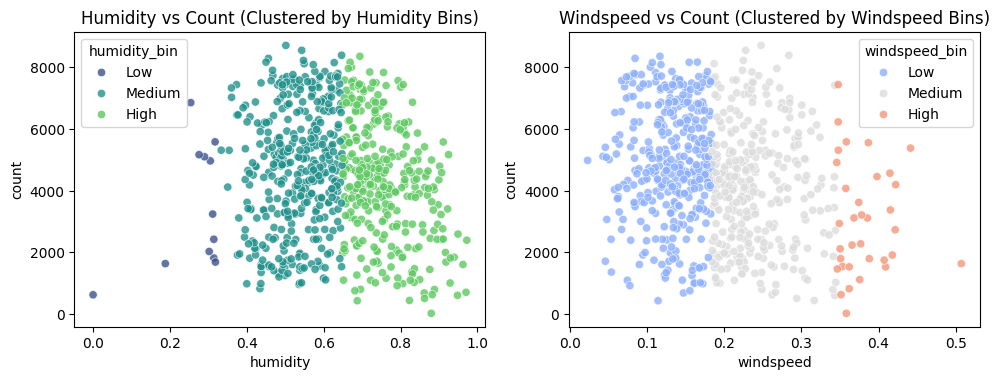

In [27]:
day_data['humidity_bin'] = pd.cut(day_data['humidity'], bins=3, labels=["Low", "Medium", "High"])

day_data['windspeed_bin'] = pd.cut(day_data['windspeed'], bins=3, labels=["Low", "Medium", "High"])

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.scatterplot(
    x="humidity",
    y="count",
    hue="humidity_bin",
    palette="viridis",
    data=day_data,
    alpha=0.8
)
plt.title("Humidity vs Count (Clustered by Humidity Bins)")

plt.subplot(2, 2, 2)
sns.scatterplot(
    x="windspeed",
    y="count",
    hue="windspeed_bin",
    palette="coolwarm",
    data=day_data,
    alpha=0.8
)
plt.title("Windspeed vs Count (Clustered by Windspeed Bins)")

plt.tight_layout()

plt.show()

From the 2 visualizations shown above, it can be concluded that when humidity is high, the number of bicycle rentals tends to increase compared to when humidity is low. While for windspeed, it can be concluded that when windspeed is low, the number of bicycle rentals tends to be higher than when windspeed is high.

## Conclusion

- Conclution 1: There is a difference between the peak and valley of bike-sharing usage in the months of two years (2011 and 2012). The peak in 2011 occurred in June and the valley occurred in January, while the peak in 2012 occurred in September and the same valley in January. From the visualization, we can observe that the total number of bikes rented in 2012, overall, increased significantly compared to 2011.

- Conclution 2: The percentage of total bicycle rentals during clear/partly cloudy weather was 63.3%. This is significantly higher than during misty/cloudy weather which was only 33.8% and during light rain/snow weather which was only 2.9%.

- Conclution 3: From the visualization above, it can be seen that the lowest bicycle rentals occur in the time range 11pm - 6am, while the highest peak bicycle rentals occur at 8am and in the time range 5pm - 6pm.

- Conclusion 4: From the 2 visualizations shown above, it can be concluded that when humidity is high, the number of bicycle rentals tends to increase compared to when humidity is low. While for windspeed, it can be concluded that when windspeed is low, the number of bicycle rentals tends to be higher than when windspeed is high.